In [ ]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size
#text generation apostrpphe breaking

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras import optimizers
import sys
from keras.callbacks import LambdaCallback
import random
import matplotlib.pyplot as plt



In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def generate_text(seed_text, numb_next_words):
    output=seed_text
    for i in range (numb_next_words):
        
        words_gen = set(seed_text.split())
        words_gen=list(words_gen) #create list of unique words in seed text
        
        
#         for i in range (len(words_gen)): #replace all ' in seed text
#             words_gen[i]=words_gen[i].replace("‘", '').replace("’", '').replace("'", '')
            
        #create a dictionary with index and word
        word_indices_gen = dict((c, i) for i, c in enumerate(words_gen, 1)) 
        
       #turn sentence into a sequence of numbers
        sequence=[] 
        for word in seed_text.split():
            sequence.append(word_indices_gen[word])
        sequence_padded = pad_sequences([sequence], maxlen=10, padding='pre')
#         sequence_padded=sequence
            
        #create an embedding matrix with same indices as word_index 
        EMBEDDING_DIM=25
        total_words=len(word_indices_gen)+1
        embedding_matrix = np.zeros((total_words, EMBEDDING_DIM))
        for word, i in word_indices_gen.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # words not found in embedding index will be all-zeros.
                embedding_matrix[i] = embedding_vector
        #create X input with embedding matrix for specific words (by their index)
        gener=[]
        for number in sequence_padded:
            gener.append(embedding_matrix[number])

        predicted=model.predict([gener], verbose=0)

        predicted=sample(predicted[0])
        output_word=""
        for word, index in word_indices.items():
            if index == predicted:
                output_word = word
                break
        output+=" " + output_word
        seed_text+=" " + output_word
        seed_text=seed_text.split(' ', 1)[1]
    return output

In [ ]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(listofwords) - maxlen - 1)
    for diversity in [0.5, 1.0]:
        print('----- diversity:', diversity)
        generated = ''
        sentence = listofwords[start_index: start_index + maxlen].str.cat(sep=' ')
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generate_text(generated, 20))


In [ ]:
with open('../Load_Tweets/data/ArtOfTheDeal.txt', 'r') as f:
    file = f.read()

In [ ]:
lines= file.split('\n')
total_text=''.join(lines)
listofwords=file.split()

In [ ]:
top_words=pd.Series(listofwords).value_counts()
top_words_percent= top_words/len(listofwords)
top_words[10:30].plot.bar()
# top_words.head(50)

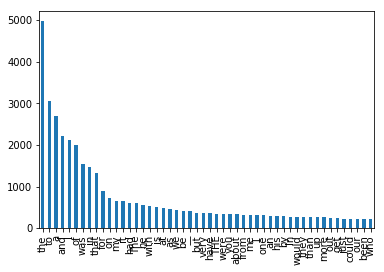

In [8]:
top_words=pd.Series(listofwords).value_counts()
top_words_percent= top_words/len(listofwords)
top_words.head(50).plot.bar()
# top_words.head(50)

In [9]:
total_chars=len(total_text)
total_chars


548701

In [10]:
total_words=len(listofwords)
total_words

99976

In [11]:
for i in range(len(listofwords)-1):
    listofwords[i]=listofwords[i].replace("‘", '').replace("’", '').replace("'", '')
len(listofwords)

99976

In [12]:
chars = set(total_text)
words = set(listofwords)
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 13835
total number of unique chars 99


In [13]:
words=list(words)

In [ ]:
# #replace apostrophes in dictionary keys 
# for i in range (len(words)):
#     words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')

In [25]:
words=set(words)
total_words_unq=words
len(words)
len(total_words_unq)

13835

In [15]:
#create forward and reverse word index
word_indices = dict((c, i) for i, c in enumerate(words, 1))
indices_word = dict((i, c) for i, c in enumerate(words,1 ))

In [78]:
len(word_indices)
max(word_indices.values())

13835

In [17]:
idx = listofwords.index('')

while idx >= 0:
    del listofwords[idx]
    try:
        idx = listofwords.index('')
    except ValueError:
        idx = -1

In [97]:
#choose step 

maxlen = 10
step = 1

sentences = []
next_words = []
list_words = []

sentences2 = []
uniq = set()


for i in range(0, len(listofwords) - maxlen, step):
    sentences2 = ' '.join(listofwords[i: i + maxlen])
    sentences.append(sentences2)
    if len(sentences2.split()) == 7:
           print (sentences2)
    next_words.append((listofwords[i + maxlen]))

print ('length of sentence list:', len(sentences))
print ("length of next_words list", len(next_words))
# sentences=sentences[0:len(sentences)-10]


length of sentence list: 99951
length of next_words list 99951


In [98]:
print('number of unique words after step', len(set(next_words)))

number of unique words after step 13834


In [99]:
sequences=[]
y=[]
uniq = set()
for i, sentence in enumerate(sentences):
    sequence=[]
    for j, word in enumerate(sentence.split()):
        sequence.append(word_indices[word])
    sequences.append(sequence)
    uniq.add(len(sequence))
    y.append(word_indices[next_words[i]])
uniq

{10}

In [100]:
sequences=np.asarray(sequences)
sequences

array([[ 1027,  5233,  2337, ..., 11336, 13430,  2085],
       [ 5233,  2337,  3647, ..., 13430,  2085,   438],
       [ 2337,  3647,  5635, ...,  2085,   438, 12744],
       ...,
       [13271,  9337,  4989, ..., 13144, 13574,   924],
       [ 9337,  4989,  9909, ..., 13574,   924, 13297],
       [ 4989,  9909,  5341, ...,   924, 13297,  6704]])

In [101]:
total_words= len(word_indices)+1
total_words

13836

In [102]:
embeddings_index = {}
f = open('../word_embeding/glove.twitter.27B.25d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [103]:
max(word_indices.values())
len(word_indices)

13835

In [104]:
EMBEDDING_DIM=25
embedding_matrix = np.zeros((total_words, EMBEDDING_DIM)) 
for word, i in word_indices.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [105]:
embedding_matrix.shape

(13836, 25)

In [106]:
X=[]
for number in sequences:
    X.append(embedding_matrix[number])

In [107]:
X=np.asarray(X)

In [108]:
np.asarray(X).shape

(99951, 10, 25)

In [109]:
embedding_matrix.shape

(13836, 25)

In [110]:
len(embedding_matrix)
len(word_indices)
len(sentences)
embedding_matrix.shape

(13836, 25)

In [111]:
np.asarray(y).shape

(99951,)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
number_classes=len(set(next_words))
number_classes

13834

In [114]:
len(set(y))

13834

In [115]:
testing=set(y_train)
# len(set(y_train)) + len(set(y_test))
testing.update(set(y_test))
len(testing)

13834

In [116]:
len(word_indices)
max(word_indices.values())

13835

In [117]:
X_train_sample=X_train[0:10000]
y_train_sample=y_train[0:10000]
X_test_sample=X_test[0:1000]
y_test_sample=y_test[0:1000]

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Input
from keras.regularizers import L1L2
from keras import regularizers
from keras import metrics
# embedding_layer= Embedding(total_words, EMBEDDING_DIM, weights=[embedding_matrix],input_length=max_seq,trainable=False)
# sequence_input = Input(shape=(max_seq,), dtype='int32')
# embedded_sequences= embedding_layer(sequence_input)
model=Sequential()
# e=Embedding(total_words, EMBEDDING_DIM, weights=[embedding_matrix],input_length=maxlen,trainable=False)
# model.add(e)
model.add(LSTM(128, input_shape=(maxlen, EMBEDDING_DIM), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
# model.add(LSTM(512, return_sequences=False))
# model.add(Dropout(0.1))
# model.add(Flatten())
model.add(Dense(number_classes, activation="softmax"))
optimizer = RMSprop(lr=0.01)
# sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=optimizer)
model.summary()

# model.add(LSTM(128, input_shape=(maxlen, len(chars))))
# model.add(Dense(len(chars), activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=optimizer)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               78848     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 13834)             1784586   
Total params: 1,863,434
Trainable params: 1,863,434
Non-trainable params: 0
_________________________________________________________________


In [119]:
# from keras.models import load_model
# model= load_model("../Saved_models/failed_on_99th_epoch_word_embedding")

In [120]:
# print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5)
model.fit(X_train, y_train, validation_split=0.2, epochs=10,callbacks=[early_stopping])

Train on 63968 samples, validate on 15992 samples
Epoch 1/10
16928/63968 [======>.......................] - ETA: 45s - loss: nan - acc: 0.0303

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_test_sample, y_test_sample, verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('loss: %f' % (loss))
perplexity = np.exp2(loss)
print ('perplexity: {}'.format(perplexity))


In [ ]:
print (generate_text("i will", 20))

In [ ]:
# model.save('../failed_on_99th_epoch_word_embedding')

In [ ]:
predictions_test=model.predict(X_test)

In [ ]:
len(predictions_test)